# Лабораторная работа №7
# Деревья решений

## О работе с пропущенными значениями

Рассмотрим следующий набор, содержащий пропущенные значения:

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/cylinder-bands/bands.data", 
                   header = None)
data.columns = ["timestamp", "cylinder number", "customer", "job number", "grain screened", "ink color", "proof on ctd link", 
                "blade mfg", "cylinder division", "paper type", "ink type", "direct steam", "solvent type", "type on cylinder", 
                "press type", "press", "unit number", "cylinder size", "paper mill location", "plating tank", "proof cut", "viscosity", 
                "caliper", "ink temperature", "humifity", "roughness", "blade pressure", "varnish pct", "press speed", "ink pct",
                "solvent pct", "ESA Voltage", "ESA Amperage", "wax", "hardener", "roller durometer", "current density", "anode space ratio",
                "chrome content", "bandtype"]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            541 non-null    object 
 1   cylinder number      541 non-null    object 
 2   customer             541 non-null    object 
 3   job number           541 non-null    object 
 4   grain screened       541 non-null    object 
 5   ink color            541 non-null    object 
 6   proof on ctd link    541 non-null    object 
 7   blade mfg            541 non-null    object 
 8   cylinder division    541 non-null    object 
 9   paper type           541 non-null    object 
 10  ink type             541 non-null    object 
 11  direct steam         541 non-null    object 
 12  solvent type         541 non-null    object 
 13  type on cylinder     541 non-null    object 
 14  press type           541 non-null    object 
 15  press                541 non-null    obj

Распространенная ошибка состоит в применении функций для работы со значением `NaN` до преобразования '?' в `NaN`.

In [3]:
data.isna().sum()

timestamp              0
cylinder number        0
customer               0
job number             0
grain screened         0
ink color              0
proof on ctd link      0
blade mfg              0
cylinder division      0
paper type             0
ink type               0
direct steam           0
solvent type           0
type on cylinder       0
press type             0
press                  0
unit number            0
cylinder size          1
paper mill location    1
plating tank           1
proof cut              1
viscosity              1
caliper                1
ink temperature        2
humifity               2
roughness              2
blade pressure         2
varnish pct            2
press speed            2
ink pct                2
solvent pct            2
ESA Voltage            2
ESA Amperage           2
wax                    2
hardener               2
roller durometer       2
current density        2
anode space ratio      2
chrome content         2
bandtype               2


In [4]:
data2 = data.replace('?',np.NaN)
data2.isna().sum()

timestamp                0
cylinder number          1
customer                 0
job number               1
grain screened          49
ink color                0
proof on ctd link       57
blade mfg               60
cylinder division        0
paper type               0
ink type                 1
direct steam            25
solvent type            56
type on cylinder        19
press type               1
press                    1
unit number              0
cylinder size            4
paper mill location    157
plating tank            19
proof cut               55
viscosity                6
caliper                 28
ink temperature          4
humifity                 3
roughness               32
blade pressure          65
varnish pct             57
press speed             12
ink pct                 57
solvent pct             57
ESA Voltage             58
ESA Amperage            56
wax                      8
hardener                 9
roller durometer        56
current density          9
a

Альтернатива - использовать конструкцию `pd.read_csv(url,header=None,na_values="?")`.

Другая популярная ошибка:

In [5]:
data3 = data[(data.T!='?').all()]
data3.isna().sum()

timestamp              0
cylinder number        0
customer               0
job number             0
grain screened         0
ink color              0
proof on ctd link      0
blade mfg              0
cylinder division      0
paper type             0
ink type               0
direct steam           0
solvent type           0
type on cylinder       0
press type             0
press                  0
unit number            0
cylinder size          0
paper mill location    0
plating tank           0
proof cut              0
viscosity              0
caliper                0
ink temperature        0
humifity               0
roughness              0
blade pressure         0
varnish pct            0
press speed            0
ink pct                0
solvent pct            0
ESA Voltage            0
ESA Amperage           0
wax                    0
hardener               0
roller durometer       0
current density        0
anode space ratio      0
chrome content         0
bandtype               0


Если необходимо заполнить пропущенные значения средними (медианными) значениями, то важно не забывать преобразовать признак в числовой тип при помощи функции `pd.to_numeric()` или метода `astype()`.

### Деревья (принятия) решений

Дерево принятия решений представляет собой иерархическую древовидную структуру, состоящую из решающих правил вида «Если ..., то ...». Правила автоматически генерируются в процессе обучения на обучающем множестве. 

In [6]:
import matplotlib.pyplot as plt

Используем набор "Ирисы" (3 и 4 признаки):

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [8]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

Визуализируем набор на плоскости:

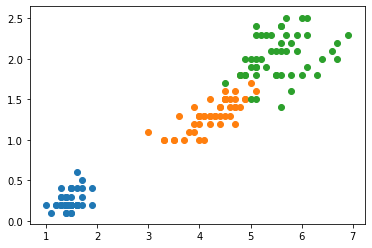

In [9]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

Для построения дерева решений будем использовать класс `DecisionTreeClassifier`:

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)  
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Построим границу принятия решения:

In [11]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

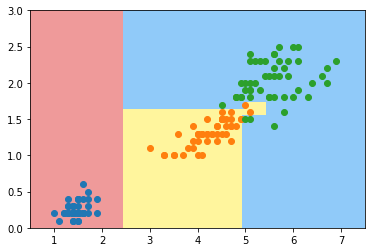

In [12]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

Визуализируем дерево принятия решений:

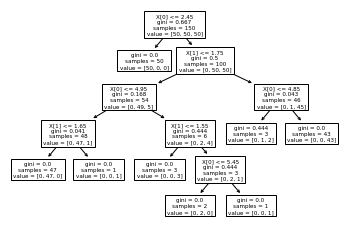

In [13]:
from sklearn.tree import plot_tree

plot_tree(dt_clf); 

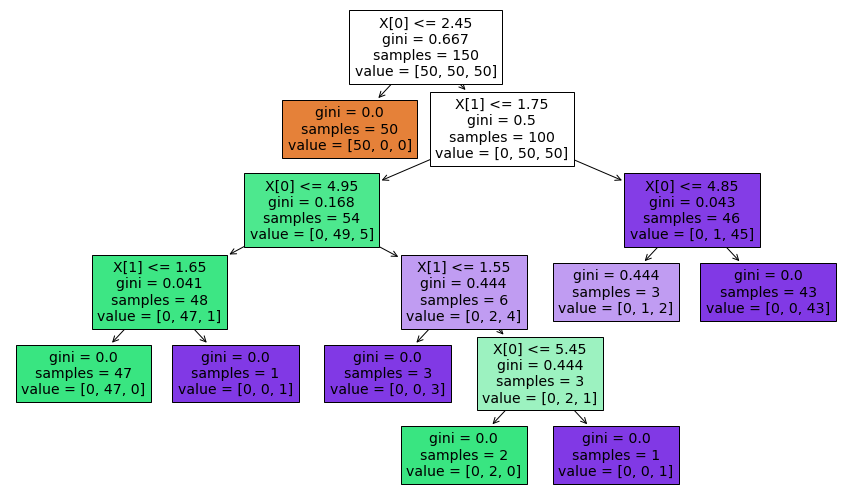

In [14]:
plt.figure(figsize=(15, 9))
plot_tree(dt_clf,filled=True); 

### Энтропия

Энтропия измеряет размеры беспорядка или неопределенности в системе. 

In [15]:
def entropy(p):
    return (-p * np.log(p) - (1-p) * np.log(1-p))/np.log(2.)

In [16]:
x = np.linspace(0.01, 0.99, 200)

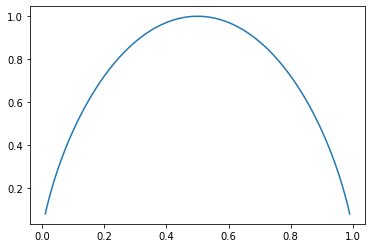

In [17]:
plt.plot(x, entropy(x))
plt.show()

### Оценка разбиения при помощи энтропии

Разбиение имеет более низкую энтропию (или низкий беспорядок), если оно относительно чисто, т.е. большинство точек имеют одну и ту же метку. С другой стороны, разбиение имеет более высокую энтропию (или беспорядок), если метки классов перемешаны и не существует определенного класса для большинства меток.

Если область чиста, т.е. состоит из точек одного и того же класса, то энтропия равна нулю. 

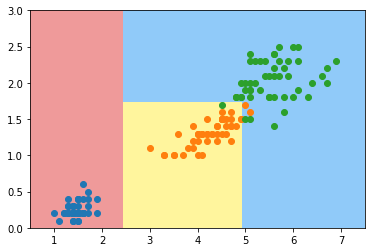

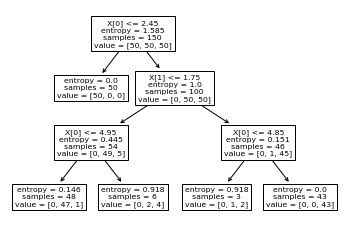

In [18]:
dt_clf = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()
plot_tree(dt_clf); 

Решение (точка разбиения) $X_{d}\leqslant v$ разбивает пространство данных $\mathbf{D}$ на две области $\mathbf{D}_{Y}$ и $\mathbf{D}_{N}$, которые представляют собой множества всех возможных точек, которые удовлетворяют решению, и тех точек, которые ему не удовлетворяют. 

In [19]:
def split(X, y, d, v):
    index_a = (X[:,d] <= v)
    index_b = (X[:,d] > v)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [20]:
Dy,Dn,_,_ = split(X, y, 0, 1.4)
Dn[:10]

array([[1.5, 0.2],
       [1.7, 0.4],
       [1.5, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2]])

Энтропия множества помеченных точек $\mathbf{D}$ определяется как

$H\left(\mathbf{D}\right)=-\sum_{i=1}^{k}\mathbb{P}\left[c_{i}\mid\mathbf{D}\right]\,\log_{2}\mathbb{P}\left[c_{i}\mid\mathbf{D}\right],$

где $\mathbb{P}\left[c_{i}\mid\mathbf{D}\right]$ – вероятность класса $c_{i}$ в $\mathbf{D}$ и $k$ – число классов.


Если классы перемешаны и каждый появляется с равной вероятностью $\mathbb{P}\left[c_{i}\mid\mathbf{D}\right]=\frac{1}{k}$, то энтропия имеет наивысшее значение $H\left(\mathbf{D}\right)=\log_{2}k$.

In [21]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res/log(2.)

In [22]:
entropy(y)

1.584962500721156

Определим энтропию разбиения (split entropy) как взвешенную энтропию каждой из образующихся областей 

$H\left(\mathbf{D}_{Y},\mathbf{D}_{N}\right)=\frac{n_{Y}}{n}H\left(\mathbf{D}_{Y}\right)+\frac{n_{N}}{n}H\left(\mathbf{D}_{N}\right),$

где $n=\left|\mathbf{D}\right|$ – это число точек в $\mathbf{D}$ и $n_{Y}=\left|\mathbf{D}_{Y}\right|$ и $n_{N}=\left|\mathbf{D}_{N}\right|$ – это число точек в $\mathbf{D}_{Y}$ и $\mathbf{D}_{N}$. 

Для определения параметров оптимального разбиения (включая энтропию) используем следующую функцию: 

In [23]:
def try_split_ent(X, y):
    
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                
    return best_entropy, best_d, best_v

In [24]:
best_entropy, best_d, best_v = try_split_ent(X, y)
print("Лучшая энтропия разбиения =", best_entropy)
print("Лучший признак (d) =", best_d)
print("Лучшая точка (v) =", best_v)

Лучшая энтропия разбиения = 0.6666666666666666
Лучший признак (d) = 0
Лучшая точка (v) = 2.45


In [25]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [26]:
entropy(y1_l)

0.0

In [27]:
entropy(y1_r)

1.0

In [28]:
best_entropy2, best_d2, best_v2 = try_split_ent(X1_r, y1_r)
print("Лучшая энтропия разбиения =", best_entropy2)
print("Лучший признак (d) =", best_d2)
print("Лучшая точка (v) =", best_v2)

Лучшая энтропия разбиения = 0.30983962924532515
Лучший признак (d) = 1
Лучшая точка (v) = 1.75


In [29]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [30]:
entropy(y2_l)

0.4450648570508386

In [31]:
entropy(y2_r)

0.15109697051711368

### Индекс Джини (Gini)

Индекс Джини (для множества) определяется следующим образом:

$G\left(\mathbf{D}\right)=1-\sum_{i=1}^{k}\mathbb{P}\left[c_{i}\mid\mathbf{D}\right]^{2}$

Если разбиение чисто, то индекс Джини равен нулю.

Взвешенный индекс Джини разбиения равен

$G\left(\mathbf{D}_{Y},\mathbf{D}_{N}\right)=\frac{n_{Y}}{n}G\left(\mathbf{D}_{Y}\right)+\frac{n_{N}}{n}G\left(\mathbf{D}_{N}\right)$

Чем меньше значение взвешенного индекса Джини, тем лучше разбиение. 

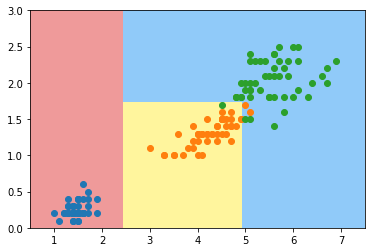

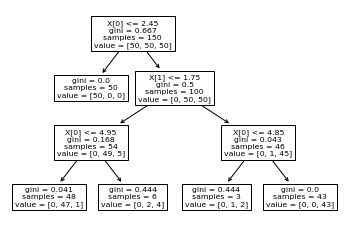

In [32]:
dt_clf = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()
plot_tree(dt_clf); 

In [33]:
def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

In [34]:
gini(y)

0.6666666666666665

In [35]:
def try_split_gini(X, y):
    
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                g = p_l * gini(y_l) + p_r * gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
                
    return best_g, best_d, best_v

In [36]:
best_g, best_d, best_v = try_split_gini(X, y)
print("Лучший взвешенный индекс Джини =", best_g)
print("Лучший признак (d) =", best_d)
print("Лучшая точка (v) =", best_v)

Лучший взвешенный индекс Джини = 0.3333333333333333
Лучший признак (d) = 0
Лучшая точка (v) = 2.45


In [37]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [38]:
gini(y1_l)

0.0

In [39]:
gini(y1_r)

0.5

In [40]:
best_g2, best_d2, best_v2 = try_split_gini(X1_r, y1_r)
print("Лучший взвешенный индекс Джини =", best_g2)
print("Лучший признак (d) =", best_d2)
print("Лучшая точка (v) =", best_v2)

Лучший взвешенный индекс Джини = 0.1103059581320451
Лучший признак (d) = 1
Лучшая точка (v) = 1.75


In [41]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [42]:
gini(y2_l)

0.1680384087791495

In [43]:
gini(y2_r)

0.04253308128544431

### Параметры конструктора класса DecisionTreeClassifier

Конструктор класса `DecisionTreeClassifier` имеет целый ряд параметров, включая следующие:

* criterion{“gini”, “entropy”}, default=”gini”
  * функция для измерения качества разбиения

* splitter{“best”, “random”}, default=”best”
  * стратегия разбиения 

* max_depth: int, default=None
  * максимальная глубина дерева. Если None, то узлы раскрываются до тех пор, пока все листья не будут чистыми или пока все листья не будут содержать меньше, чем min_samples_split точек

* min_samples_split: int or float, default=2
  * минимальное количество точек для разбиения внутреннего узла

* min_samples_leaf: int or float, default=1
  * минимальное количество точек, необходимое на узле для разбиения

* max_leaf_nodes: int, default=None
  * максимальное количество узлов-листьев 
  
Эти и другие параметры существенно влияют на работу классификатора.

In [44]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

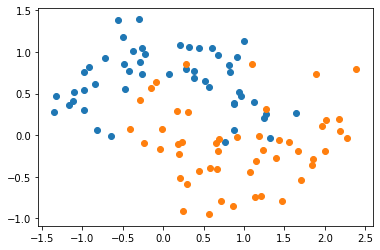

In [45]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

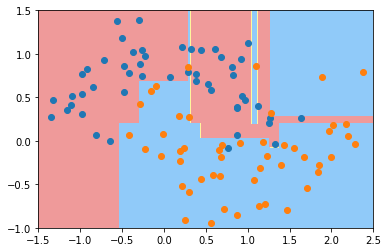

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

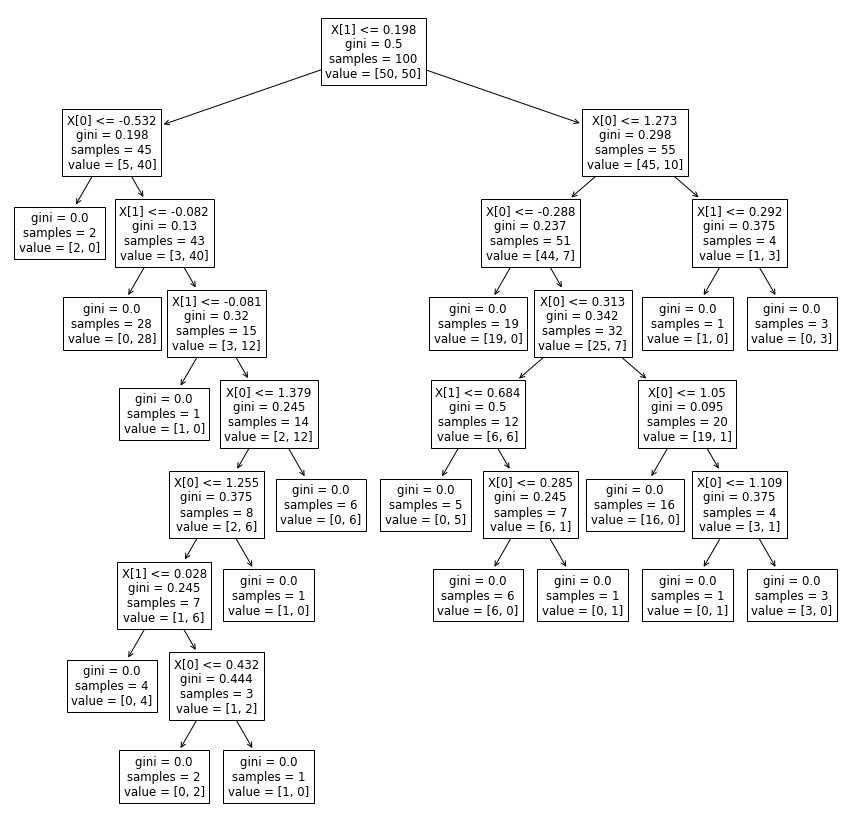

In [47]:
plt.figure(figsize=(15,15))
plot_tree(dt_clf);

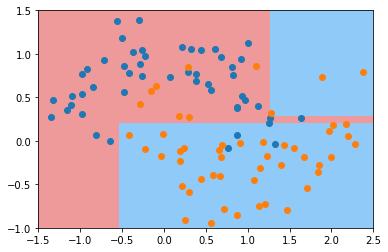

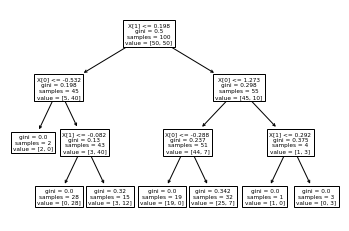

In [48]:
dt_clf2 = DecisionTreeClassifier(max_depth=3)
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
plot_tree(dt_clf2); 

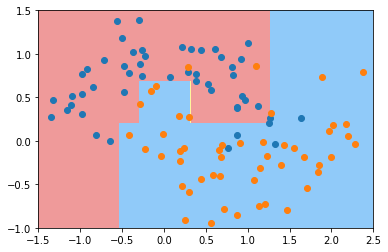

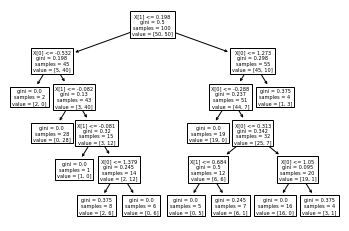

In [49]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
plot_tree(dt_clf3); 

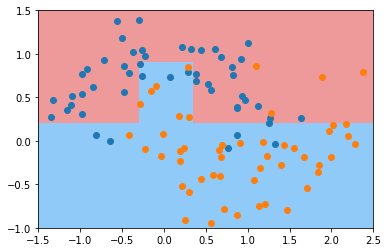

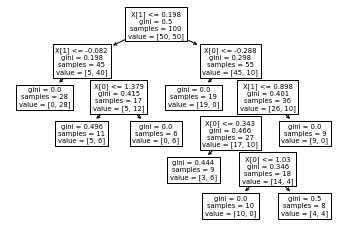

In [50]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
plot_tree(dt_clf4); 

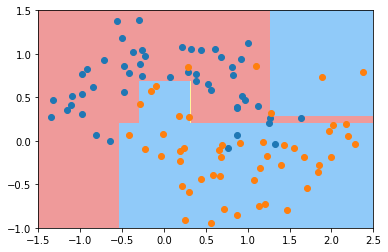

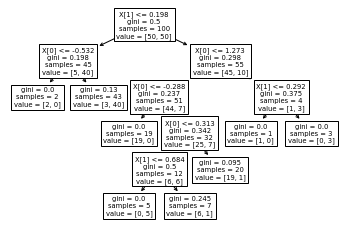

In [51]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=8)
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
plot_tree(dt_clf5); 

### Проблемы при использовании деревьев решений

In [52]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
X.shape

(150, 2)

In [53]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=1)
tree_clf.fit(X, y);

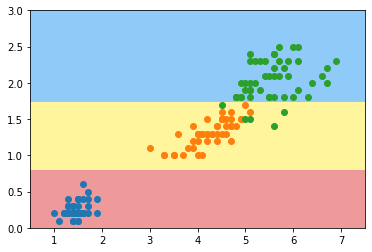

In [54]:
plot_decision_boundary(tree_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [55]:
X_new = np.delete(X, 140, axis=0)
y_new = np.delete(y, 140)

In [56]:
X_new.shape

(149, 2)

In [57]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf2.fit(X_new, y_new);

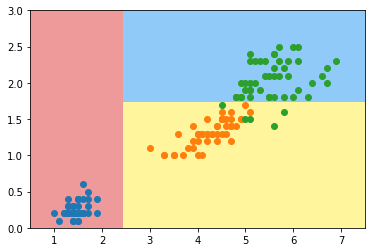

In [58]:
plot_decision_boundary(tree_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## Ансамбли классификаторов

Ансамблевые методы (ensemble methods) создают комбинированный классификатор, используя выходные данные нескольких базовых классификаторов, которые обучаются на разных наборах данных.  
В зависимости от выбора обучающих наборов и стабильности базовых классификаторов ансамблевые классификаторы могут помочь уменьшить дисперсию и смещение, что приведет к повышению качества классификации.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

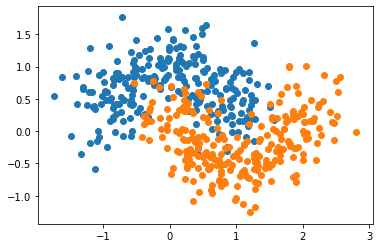

In [61]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.864

In [64]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.896

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,random_state=666)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.896

In [66]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

Построим комбинированный бинарный классификатор следующим образом:

In [67]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

In [68]:
y_predict

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.904

Построенный комбинированный классификатор имеет более высокое качество классификации, чем любой из использованных базовых классификаторов.

Для построения комбинированных классификаторов в scikit-learn есть класс `VotingClassifier`, позволяющий объединить  несколько не похожих между собой классификаторов в один классификатор.

Среди параметров `VotingClassifier` есть параметр `voting` с двумя возможными значениями: 'hard' и 'soft'. 
В первом случае итоговый ответ объединенного классификатора будет соответствовать «мнению» большинства входящих в него классификаторов. Во втором случае, т.е. при использовании значения 'soft' параметра  `voting` идет полноценное «голосование» и взвешивание предсказаний моделей для каждого класса, таким образом итоговый ответ объединенного классификатор — это `argmax` суммы предсказанных вероятностей.

In [70]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='hard')

In [71]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.904

При использовании класса `VotingClassifier` с параметром 'soft' получаем:

In [72]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='soft')

In [73]:
voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

0.904

## Метод бэггинга

Метод бэггинга (Bagging, Bootstrap Aggregation) представляет собой ансамблевый метод классификации, который использует несколько выборок (с заменой) из входного набора данных для создания немного различающихся обучающих наборов.
Термин `Bootstrap` означает, что используются имеющиеся данные и они размножаются при помощи выборок с заменой — в результате получаются несколько наборов одного размера и немного отличающихся друг от друга. 
Бэггинг состоит из следующих шагов:
1. Получение нескольких образцов с помощью замены из вашего набора данных (бутстрэпинг).
2. Обучение классификатора для каждого образца.
3. Усреднение результатов каждого классификатора.

Основная идея бэггинга — усреднить «шумные» модели с низким смещением для создания модели с низкой дисперсией.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

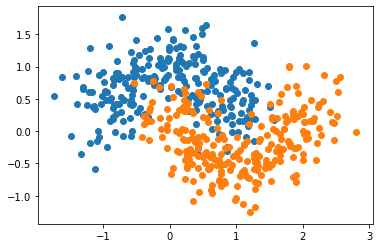

In [76]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666) 

In [78]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=50, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.872

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.872

## Процедура OOB (out-of-bag)

Генерация повторных случайных выборок из исходного набора данных (бутстреп) дает хорошую возможность провести специальную процедуру перекрестной проверки, называемую тестом по наблюдениям, "не попавшим в сумку" (out-of-bag observations). Поскольку ключевая идея бэггинга состоит в многократном построении моделей по наблюдениям из бутстреп-выборок, то каждое конкретное дерево строится на основе примерно двух третей всех наблюдений. Остальная треть наблюдений не используется в обучении, но вполне может быть использована для независимого тестирования.

OOB-ошибка — это встроенная версия расчёта ошибки классификатора. Это удобно, потому что  не нужно откладывать часть точек в тестовую выборку в самом начале. 

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=50, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)
bagging_clf.score(X_test, y_test)

0.888

In [81]:
bagging_clf.oob_score_

0.912

Для ускорения обучения классификатора на многоядерных процессорах можно использовать параметр `n_jobs`:

In [82]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=5000, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

Wall time: 7.58 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [83]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=5000, max_samples=100,
                               bootstrap=True, oob_score=True,
                               n_jobs=-1)
bagging_clf.fit(X, y)

Wall time: 5.42 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


Уменьшение размера выборки может приводить к повышению качества классификатора:

In [84]:
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=500,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.818

In [85]:
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.866

## Случайный лес и сверхслучайные деревья

Метод случайного леса (Random Forest) представляет собой дальнейшее улучшение бэггинга деревьев решений, которое заключается в устранении корреляции между деревьями. Как и в случае с бэггингом, мы строим несколько сотен деревьев решений по обучающим бутстреп-выборкам. Однако на каждой итерации построения дерева случайным образом выбирается некоторое число признаков и разбиение разрешается выполнять только по одному из этих признаков.

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

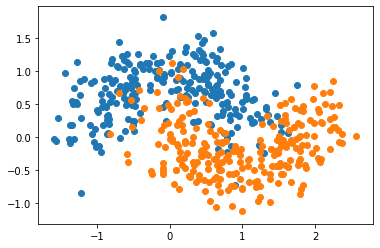

In [88]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, 
                                random_state=666, n_jobs=-1)
rf_clf.fit(X, y);

In [90]:
rf_clf.oob_score_

0.892

In [91]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, oob_score=True, 
                                 random_state=666, n_jobs=-1)
rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.906

### Сверхслучайные деревья (Extra-Trees)

В сверхслучайных деревьях (Extremely Randomized Trees) больше случайности в том, как вычисляются разделения в узлах. Как и в случайных лесах, используется случайное подмножество возможных признаков, но вместо поиска наиболее оптимальных порогов, пороговые значения произвольно выбираются для каждого возможного признака, и наилучший из этих случайно генерируемых порогов выбирается как лучшее правило для разделения узла. Это обычно позволяет немного уменьшить дисперсию модели за счет несколько большего увеличения смещения.

In [92]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, bootstrap=True, oob_score=True, 
                              random_state=666, n_jobs=-1)
et_clf.fit(X, y);

In [93]:
et_clf.oob_score_

0.9

Сверхслучайные деревья (в качестве побочного эффекта) позволяют оценить важность признаков, чтобы в дальнейшем провести отбор на основе важности признаков.

В представленном ниже примере мы обучаем классификатор `ExtraTreesClassifier`, чтобы с его помощью определить важность признаков в наборе Ирисы. 

In [94]:
# load data
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

In [95]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.10917491 0.06139855 0.40765042 0.42177612]


### Случайный лес в наборе данных о кредитовании

Рассмотрим данные о кредитовании в файле __loan_data.csv__ и попытаемся классифицировать и предсказать, полностью ли заемщик выплатил свой кредит.

Данные в столбцах представляют собой слндующее:

* **credit.policy**: 1, если клиент соответствует критериям кредитного андеррайтинга, и 0 в противном случае.
* **purpose**: цель ссуды (принимает значения "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" и "all_other").
* **int.rate**: процентная ставка по ссуде в виде пропорции (ставка 11% будет сохранена как 0,11). Более рискованным заемщикам назначаются более высокие процентные ставки.
* **installment**: ежемесячные платежи, подлежащие уплате заемщиком, если ссуда финансируется.
* **log.annual.inc**: Натуральный логарифм годового дохода заемщика, представленный самооценкой.
* **dti**: отношение долга к доходу заемщика (debt-to-income, сумма долга, деленная на годовой доход).
* **fico**: кредитный рейтинг FICO заемщика.
* **days.with.cr.line**: количество дней, в течение которых у заемщика была кредитная линия.
* **revol.bal**: возобновляемый баланс заемщика (сумма, не выплаченная в конце платежного цикла кредитной карты).
* **revol.util**: коэффициент использования возобновляемой линии заемщика (сумма использованной кредитной линии по отношению к общему доступному кредиту).
* **inq.last.6mths**: количество запросов от кредиторов заемщиком за последние 6 месяцев.
* **delinq.2yrs**: количество случаев просрочки платежа заемщиком на 30+ дней за последние 2 года.
* **pub.rec**: количество негативных публичных записей заемщика (заявления о банкротстве, налоговые залоги или судебные решения).
* **not.fully.paid**: количество процентов для классификации - выплатил ли заемщик деньги полностью или нет.

In [96]:
df = pd.read_csv('loan_data.csv')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [98]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [99]:
print("Данные об одобрении кредитов. 1 означает одобренный кредит, 0 - не одобренный.")
print(df['credit.policy'].value_counts())

Данные об одобрении кредитов. 1 означает одобренный кредит, 0 - не одобренный.
1    7710
0    1868
Name: credit.policy, dtype: int64


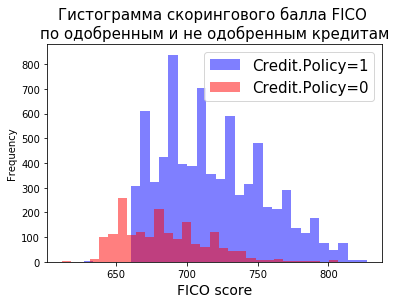

In [100]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue', label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Гистограмма скорингового балла FICO \nпо одобренным и не одобренным кредитам", fontsize=15)
plt.xlabel("FICO score", fontsize=14);

Признак **purpose** является категориальным. Преобразуем его в числовые признаки:

In [101]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [102]:
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [103]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

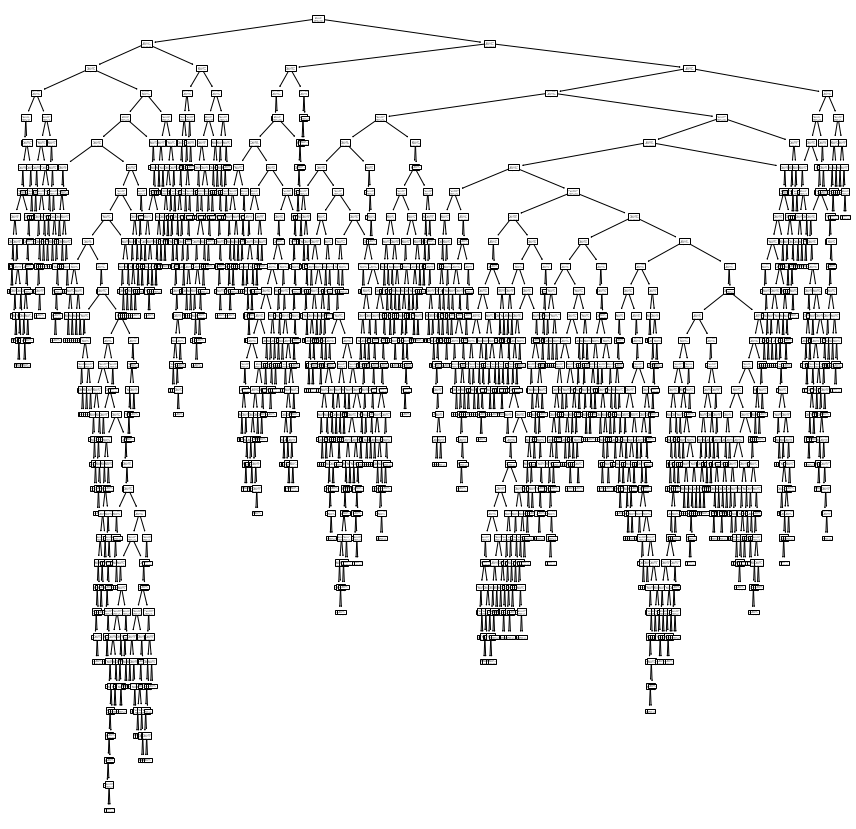

In [104]:
plt.figure(figsize=(15,15))
plot_tree(dtree); # max_depth

In [105]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2428
           1       0.20      0.23      0.21       446

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



In [106]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2015  413]
 [ 344  102]]
Accuracy of prediction: 0.737


Тренируем случайный лес и выполняем предсказание:

In [107]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [108]:
cr = classification_report(y_test,rfc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2428
           1       0.35      0.01      0.03       446

    accuracy                           0.84      2874
   macro avg       0.60      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874



In [109]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2417   11]
 [ 440    6]]
Accuracy of prediction: 0.843


In [110]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,
                                 min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

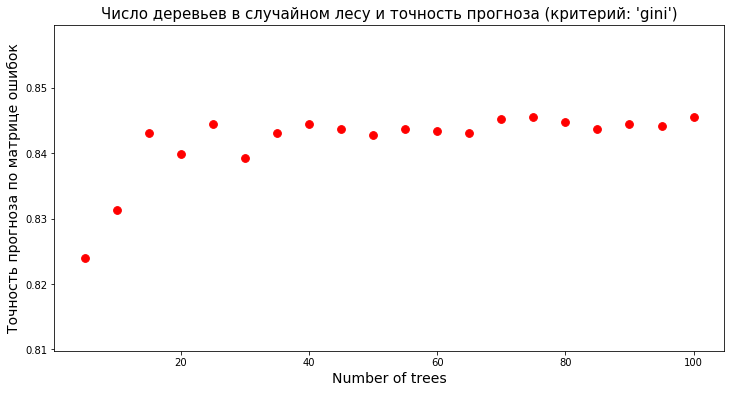

In [111]:
plt.figure(figsize=(12,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Число деревьев в случайном лесу и точность прогноза (критерий: 'gini')", 
          fontsize=15)
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("Точность прогноза по матрице ошибок", fontsize=14);

## Бустинг

Бустинг (boosting) - это ансамблевый метод, объединяющий нескольких слабых классификаторов, чтобы сформировать сильного классификатор. Под слабым классификатором понимается модель, которая работает немногим лучше случайного выбора. Самыми популярными методами бустинга являются:
* AdaBoost
* градиентный бустинг

Основная идея метода бустинга состоит в том, чтобы тщательно отбирать точки, чтобы повысить качество классификации для трудно классифицируемых точек.

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666) 

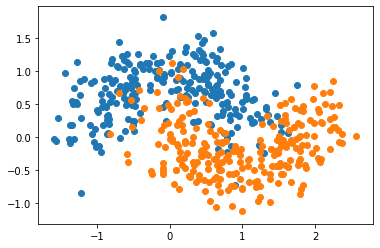

In [114]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### AdaBoost

* Адаптивный бустинг (__Ada__ptive __Boost__ing)
* Каждый следующий предиктор уделяет больше внимания случаям, ошибочно предсказанным его предшественниками.
* Достигается за счет изменения весов в обучающихся классификаторах.
* Каждому предиктору присваивается коэффициент, который зависит от ошибки обучения предиктора.

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.848

В рассматриваемом примере можно спрогнозировать вероятности получения положительного класса в тестовой выборке при помощи метода `predict_proba()`, извлекая эти вероятности из второго  столбца следующим образом:

In [117]:
y_pred_proba = ada_clf.predict_proba(X_test)[:,1]
y_pred_proba

array([0.33946645, 0.6459981 , 0.67423082, 0.25017608, 0.68635915,
       0.60076945, 0.27938861, 0.78201966, 0.25299386, 0.78201966,
       0.27938861, 0.57137564, 0.50748721, 0.51850105, 0.53053792,
       0.35517633, 0.78201966, 0.51971665, 0.49485451, 0.76014772,
       0.63747448, 0.47762219, 0.22398127, 0.63995609, 0.75228165,
       0.40560259, 0.71199023, 0.2392647 , 0.63513026, 0.29549738,
       0.50230145, 0.37214384, 0.60853542, 0.71305943, 0.30990202,
       0.54325679, 0.48541437, 0.21922266, 0.36544433, 0.68530532,
       0.35538388, 0.61258692, 0.75580299, 0.66107869, 0.52580227,
       0.29921572, 0.49920249, 0.45814553, 0.37138996, 0.36022453,
       0.40871657, 0.67701606, 0.78201966, 0.57302531, 0.59831471,
       0.69594267, 0.65677719, 0.51807089, 0.68587859, 0.33020525,
       0.46038694, 0.75580299, 0.59831471, 0.5759217 , 0.40579397,
       0.32698662, 0.39578158, 0.52175024, 0.58303564, 0.33903627,
       0.38228646, 0.73047615, 0.57592159, 0.64906614, 0.32756

Теперь можно оценить классификатор `ada_clf` при помощи показателя `ROC_AUC`. Напомним, что показатель `ROC_AUC` для бинарного классификатора можно определить с помощью функции `roc_auc_score()` из `sklearn.metrics`.

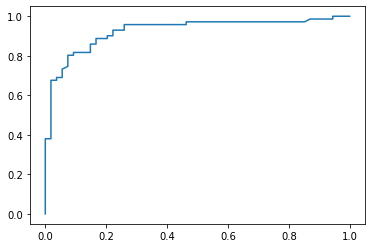

In [118]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fprs, tprs)
plt.show()

In [119]:
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.93


### Метод градиентного бустинга

* Последовательное исправление ошибок предшествующего предиктора.
* Веса точек обучающей выборки не изменяются.
* Каждый предиктор обучается с использованием остаточных ошибок своего предшественника в качестве меток.
* Деревья с градиентным бустингом: CART используется в качестве базового алгоритма.

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.904

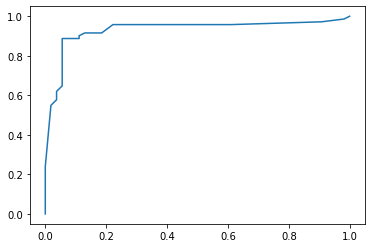

In [121]:
y_pred_proba = gb_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fprs, tprs)
plt.show()

In [122]:
# Evaluate test-set roc_auc_score
gb_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(gb_roc_auc))

ROC AUC score: 0.93


### Задание на лабораторную работу №7

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте заданный набор данных из репозитария UCI. 

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианы  класса, к которому относится точка с пропущенным значением. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding).

3.	Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки (не менее 5 и не более 10). 

4.  Разбейте набор данных на обучающую и тестовую выборки.

5.	Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите точность классификации и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности (не нужно удалять из набора все признаки кроме двух).

6. 	Постройте на основе классификатора деревьев решений ансамблевые классификаторы: 
  * BaggingClassifier, 
  * RandomForestClassifier,
  * AdaBoostClassifier, 

    а также классификатор:
  * GradientBoostingClassifier,

    подберите параметры классификаторов, чтобы добиться большей точности классификации, и постройте границы принятия решений классификаторов с визуализацией точек набора данных и легендой для меток классов. 

7. 	Определите лучший классификатор, дающий наиболее высокую точность классификации. 
